In [2]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
import json

import io
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer


import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df=pd.read_html("sp500-vs-dow-jones-vs-go.xls")



In [5]:
df

[                  DateTime  S&P 500  Dow Jones    Gold  Silver
 0      1896-07-31 00:00:10      NaN      32.02     NaN     NaN
 1      1896-08-01 00:00:10     3.81        NaN     NaN     NaN
 2      1896-08-31 00:00:10      NaN      31.97     NaN     NaN
 3      1896-09-01 00:00:10     4.01        NaN     NaN     NaN
 4      1896-09-30 00:00:10      NaN      36.05     NaN     NaN
 ...                    ...      ...        ...     ...     ...
 15877  2022-05-03 00:00:00  4175.48   33128.79  1857.9  22.630
 15878  2022-05-04 00:00:00  4300.17   34061.06  1868.7  22.595
 15879  2022-05-05 00:00:00  4146.87   32997.97  1895.2  22.915
 15880  2022-05-06 00:00:00  4123.34   32899.37     NaN     NaN
 15881  2022-05-09 00:00:00  3991.24        NaN     NaN     NaN
 
 [15882 rows x 5 columns]]

In [41]:
df_main=df[0]

In [42]:
df_main.columns

Index(['DateTime', 'S&P 500', 'Dow Jones', 'Gold', 'Silver'], dtype='object')

In [43]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15882 entries, 0 to 15881
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DateTime   15882 non-null  object 
 1   S&P 500    3032 non-null   float64
 2   Dow Jones  3028 non-null   float64
 3   Gold       13751 non-null  float64
 4   Silver     14382 non-null  float64
dtypes: float64(4), object(1)
memory usage: 620.5+ KB


In [44]:
dft=df_main.fillna(0)

In [45]:
dft

,DateTime,S&P 500,Dow Jones,Gold,Silver
0,1896-07-31 00:00:10,0.00,32.02,0.0,0.000
1,1896-08-01 00:00:10,3.81,0.00,0.0,0.000
2,1896-08-31 00:00:10,0.00,31.97,0.0,0.000
3,1896-09-01 00:00:10,4.01,0.00,0.0,0.000
4,1896-09-30 00:00:10,0.00,36.05,0.0,0.000
...,...,...,...,...,...
15877,2022-05-03 00:00:00,4175.48,33128.79,1857.9,22.630
15878,2022-05-04 00:00:00,4300.17,34061.06,1868.7,22.595
15879,2022-05-05 00:00:00,4146.87,32997.97,1895.2,22.915
15880,2022-05-06 00:00:00,4123.34,32899.37,0.0,0.000


In [46]:
dft.isnull().sum()

DateTime     0
S&P 500      0
Dow Jones    0
Gold         0
Silver       0
dtype: int64

In [47]:
dft['DateTime']=pd.to_datetime(dft['DateTime'])

In [48]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15882 entries, 0 to 15881
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   15882 non-null  datetime64[ns]
 1   S&P 500    15882 non-null  float64       
 2   Dow Jones  15882 non-null  float64       
 3   Gold       15882 non-null  float64       
 4   Silver     15882 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 620.5 KB


In [49]:
dft

,DateTime,S&P 500,Dow Jones,Gold,Silver
0,1896-07-31 00:00:10,0.00,32.02,0.0,0.000
1,1896-08-01 00:00:10,3.81,0.00,0.0,0.000
2,1896-08-31 00:00:10,0.00,31.97,0.0,0.000
3,1896-09-01 00:00:10,4.01,0.00,0.0,0.000
4,1896-09-30 00:00:10,0.00,36.05,0.0,0.000
...,...,...,...,...,...
15877,2022-05-03 00:00:00,4175.48,33128.79,1857.9,22.630
15878,2022-05-04 00:00:00,4300.17,34061.06,1868.7,22.595
15879,2022-05-05 00:00:00,4146.87,32997.97,1895.2,22.915
15880,2022-05-06 00:00:00,4123.34,32899.37,0.0,0.000


In [50]:
dft = dft.set_index("DateTime")

In [51]:
dft

,S&P 500,Dow Jones,Gold,Silver
DateTime,,,,
1896-07-31 00:00:10,0.00,32.02,0.0,0.000
1896-08-01 00:00:10,3.81,0.00,0.0,0.000
1896-08-31 00:00:10,0.00,31.97,0.0,0.000
1896-09-01 00:00:10,4.01,0.00,0.0,0.000
1896-09-30 00:00:10,0.00,36.05,0.0,0.000
...,...,...,...,...
2022-05-03 00:00:00,4175.48,33128.79,1857.9,22.630
2022-05-04 00:00:00,4300.17,34061.06,1868.7,22.595
2022-05-05 00:00:00,4146.87,32997.97,1895.2,22.915


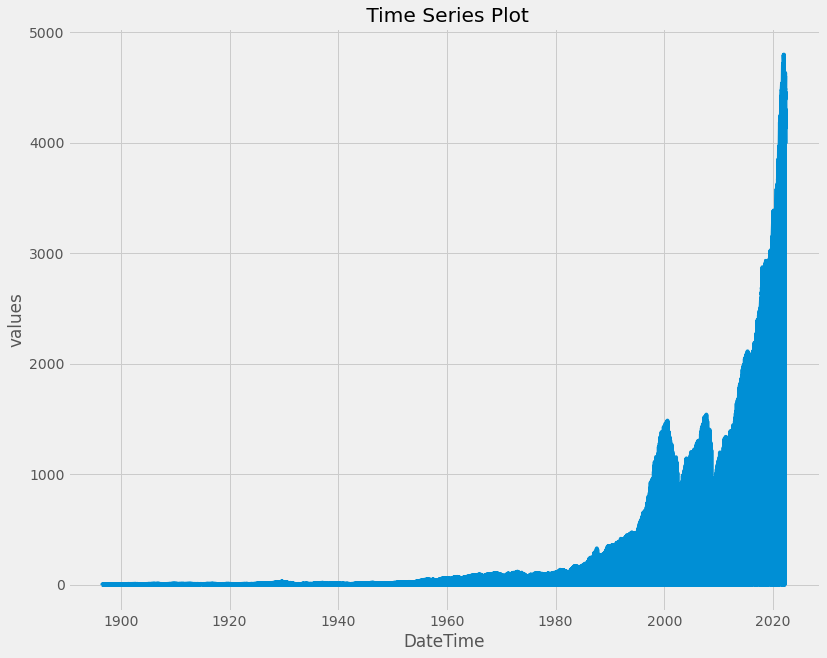

In [52]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("DateTime")
plt.ylabel("values")
plt.title(" Time Series Plot")
 
# plotting the "A" column alone
plt.plot(dft['S&P 500'])

array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>],
      dtype=object)

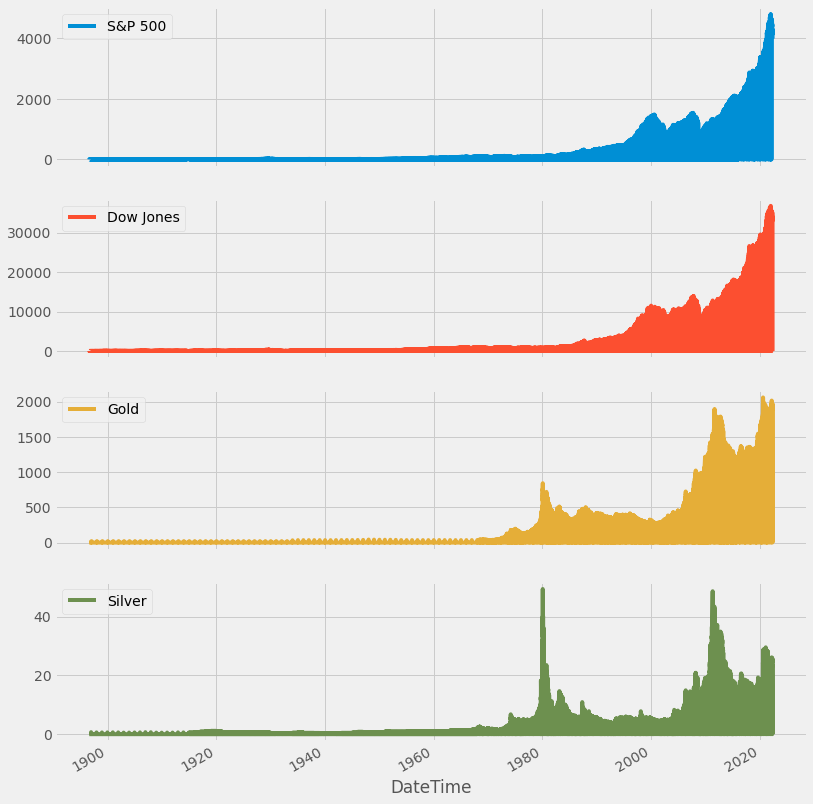

In [53]:
plt.style.use("fivethirtyeight")
dft.plot(subplots=True, figsize=(12, 15))

In [54]:
# import matplotlib.pyplot as plt
 
# # Using a inbuilt style to change
# # the look and feel of the plot
# plt.style.use("fivethirtyeight")
 
# # setting figure size to 12, 10
# plt.figure(figsize=(25, 10))
 
# # Labelling the axes and setting a
# # title
# plt.xlabel("DateTime")
# plt.ylabel("Values")
# plt.title("Bar Plot of 'S&P 500'")

 
# # plotting the "A" column alone
# plt.bar(dft.index, dft["S&P 500"], width=5)

In [55]:
dft.corr()

,S&P 500,Dow Jones,Gold,Silver
S&P 500,1.000000,0.966183,0.621849,0.420163
Dow Jones,0.966183,1.000000,0.623401,0.419814
Gold,0.621849,0.623401,1.000000,0.918283
Silver,0.420163,0.419814,0.918283,1.000000


In [56]:
dft['S&P 500'].corr(dft['Dow Jones'])

0.9661833167747765

In [57]:
dft['S&P 500'].corr(dft['Gold'])

0.6218490491826277

In [58]:
dft['S&P 500'].corr(dft['Silver'])

0.4201627007923873

In [59]:
dft['Dow Jones'].corr(dft['Silver'])

0.4198137413610577

In [60]:
dft['Dow Jones'].corr(dft['Gold'])

0.6234011196673669

In [61]:
dft['Dow Jones'].corr(dft['S&P 500'])

0.9661833167747764

In [62]:
dft['Gold'].corr(dft['S&P 500'])

0.6218490491826277

In [63]:
dft['Gold'].corr(dft['Silver'])

0.9182833619975156

In [64]:
dft['Gold'].corr(dft['Dow Jones'])

0.6234011196673668

In [65]:
dft['Silver'].corr(dft['Dow Jones'])

0.4198137413610577

In [66]:
dft['Silver'].corr(dft['Gold'])

0.9182833619975156

In [67]:
dft['Silver'].corr(dft['S&P 500'])

0.4201627007923873

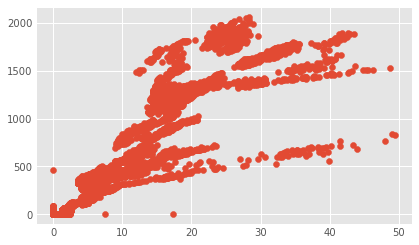

In [68]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
x=dft['Silver']
y=dft['Gold']
plt.scatter (x,y)

plt.show()

<AxesSubplot:>

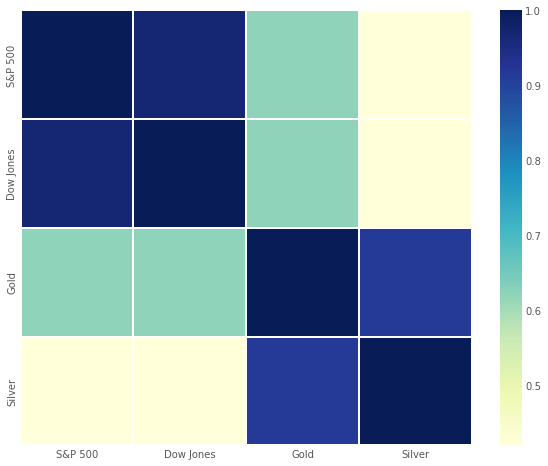

In [69]:
corrmat = dft.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [70]:
output=dft.to_json('temp.json')

In [71]:
output

In [72]:
dft.describe()

,S&P 500,Dow Jones,Gold,Silver
count,15882.000000,15882.000000,15882.000000,15882.000000
mean,329.714603,2815.474868,509.421450,8.566219
std,950.760326,8022.469027,511.155845,8.147477
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,136.700000,3.954248
50%,0.000000,0.000000,361.175000,5.319500
75%,0.000000,0.000000,643.475000,13.308750
max,4796.560000,36799.650000,2061.500000,49.450000


In [73]:
!pip install pmdarima

Error processing line 1 of C:\Users\Swapna.N\anaconda3\lib\site-packages\vision-1.0.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\Swapna.N\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [74]:
import pandas as pd
import numpy as np

In [75]:
df= pd.read_html("sp500-vs-dow-jones-vs-go.xls",index_col="DateTime",parse_dates=True)

In [76]:
df

[                     S&P 500  Dow Jones    Gold  Silver
 DateTime                                               
 1896-07-31 00:00:10      NaN      32.02     NaN     NaN
 1896-08-01 00:00:10     3.81        NaN     NaN     NaN
 1896-08-31 00:00:10      NaN      31.97     NaN     NaN
 1896-09-01 00:00:10     4.01        NaN     NaN     NaN
 1896-09-30 00:00:10      NaN      36.05     NaN     NaN
 ...                      ...        ...     ...     ...
 2022-05-03 00:00:00  4175.48   33128.79  1857.9  22.630
 2022-05-04 00:00:00  4300.17   34061.06  1868.7  22.595
 2022-05-05 00:00:00  4146.87   32997.97  1895.2  22.915
 2022-05-06 00:00:00  4123.34   32899.37     NaN     NaN
 2022-05-09 00:00:00  3991.24        NaN     NaN     NaN
 
 [15882 rows x 4 columns]]

In [77]:
df_main=df[0]

In [78]:
dft=df_main.dropna()

In [79]:
dft

,S&P 500,Dow Jones,Gold,Silver
DateTime,,,,
2016-01-04,2012.66,17148.94,1072.70,14.000
2016-01-05,2016.71,17158.66,1078.00,14.010
2016-01-06,1990.26,16906.51,1083.85,14.005
2016-01-07,1943.09,16514.10,1096.00,14.030
2016-01-08,1922.03,16346.45,1097.45,14.040
...,...,...,...,...
2022-04-28,4287.50,33916.39,1890.00,23.160
2022-04-29,4131.93,32977.21,1915.45,23.445
2022-05-03,4175.48,33128.79,1857.90,22.630


In [80]:
dft.shape

(1569, 4)

In [81]:
dft.head()

,S&P 500,Dow Jones,Gold,Silver
DateTime,,,,
2016-01-04,2012.66,17148.94,1072.70,14.000
2016-01-05,2016.71,17158.66,1078.00,14.010
2016-01-06,1990.26,16906.51,1083.85,14.005
2016-01-07,1943.09,16514.10,1096.00,14.030
2016-01-08,1922.03,16346.45,1097.45,14.040


<AxesSubplot:xlabel='DateTime'>

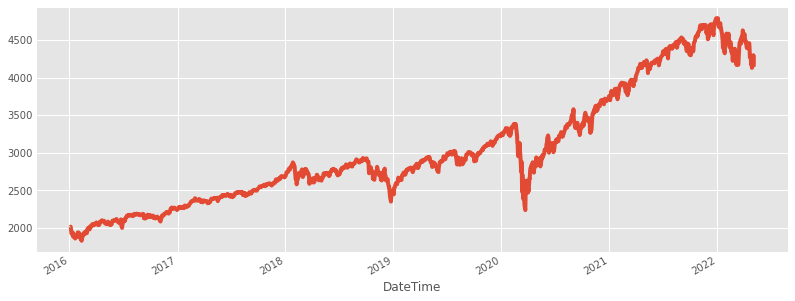

In [82]:
dft['S&P 500'].plot(figsize=(12,5))

<AxesSubplot:xlabel='DateTime'>

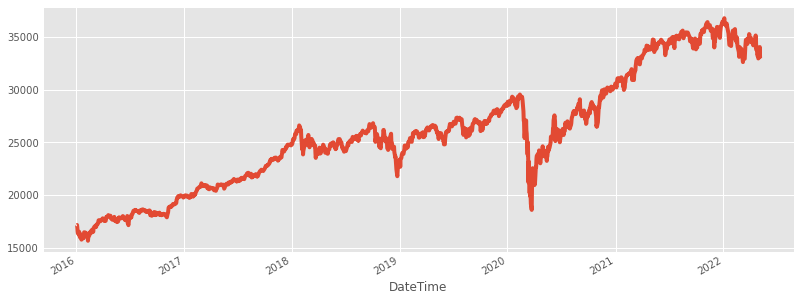

In [83]:
dft['Dow Jones'].plot(figsize=(12,5))

<AxesSubplot:xlabel='DateTime'>

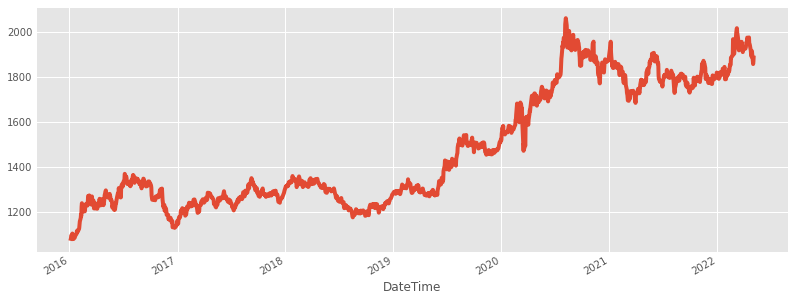

In [84]:
dft['Gold'].plot(figsize=(12,5))

<AxesSubplot:xlabel='DateTime'>

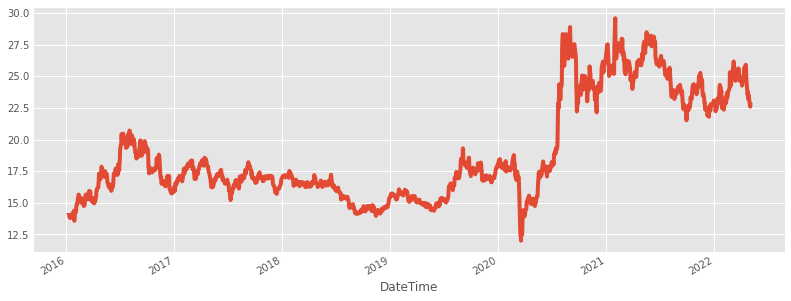

In [85]:
dft['Silver'].plot(figsize=(12,5))

In [86]:
#VAR Model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [87]:
df= pd.read_html("sp500-vs-dow-jones-vs-go.xls",index_col="DateTime",parse_dates=True)


In [88]:
df

[                     S&P 500  Dow Jones    Gold  Silver
 DateTime                                               
 1896-07-31 00:00:10      NaN      32.02     NaN     NaN
 1896-08-01 00:00:10     3.81        NaN     NaN     NaN
 1896-08-31 00:00:10      NaN      31.97     NaN     NaN
 1896-09-01 00:00:10     4.01        NaN     NaN     NaN
 1896-09-30 00:00:10      NaN      36.05     NaN     NaN
 ...                      ...        ...     ...     ...
 2022-05-03 00:00:00  4175.48   33128.79  1857.9  22.630
 2022-05-04 00:00:00  4300.17   34061.06  1868.7  22.595
 2022-05-05 00:00:00  4146.87   32997.97  1895.2  22.915
 2022-05-06 00:00:00  4123.34   32899.37     NaN     NaN
 2022-05-09 00:00:00  3991.24        NaN     NaN     NaN
 
 [15882 rows x 4 columns]]

In [89]:
df_main=df[0]

In [90]:
dft=df_main.dropna()

In [91]:
dft

,S&P 500,Dow Jones,Gold,Silver
DateTime,,,,
2016-01-04,2012.66,17148.94,1072.70,14.000
2016-01-05,2016.71,17158.66,1078.00,14.010
2016-01-06,1990.26,16906.51,1083.85,14.005
2016-01-07,1943.09,16514.10,1096.00,14.030
2016-01-08,1922.03,16346.45,1097.45,14.040
...,...,...,...,...
2022-04-28,4287.50,33916.39,1890.00,23.160
2022-04-29,4131.93,32977.21,1915.45,23.445
2022-05-03,4175.48,33128.79,1857.90,22.630


In [92]:
dft.shape

(1569, 4)

In [93]:
dft.head()

,S&P 500,Dow Jones,Gold,Silver
DateTime,,,,
2016-01-04,2012.66,17148.94,1072.70,14.000
2016-01-05,2016.71,17158.66,1078.00,14.010
2016-01-06,1990.26,16906.51,1083.85,14.005
2016-01-07,1943.09,16514.10,1096.00,14.030
2016-01-08,1922.03,16346.45,1097.45,14.040


In [94]:
dftt=dft.dropna()

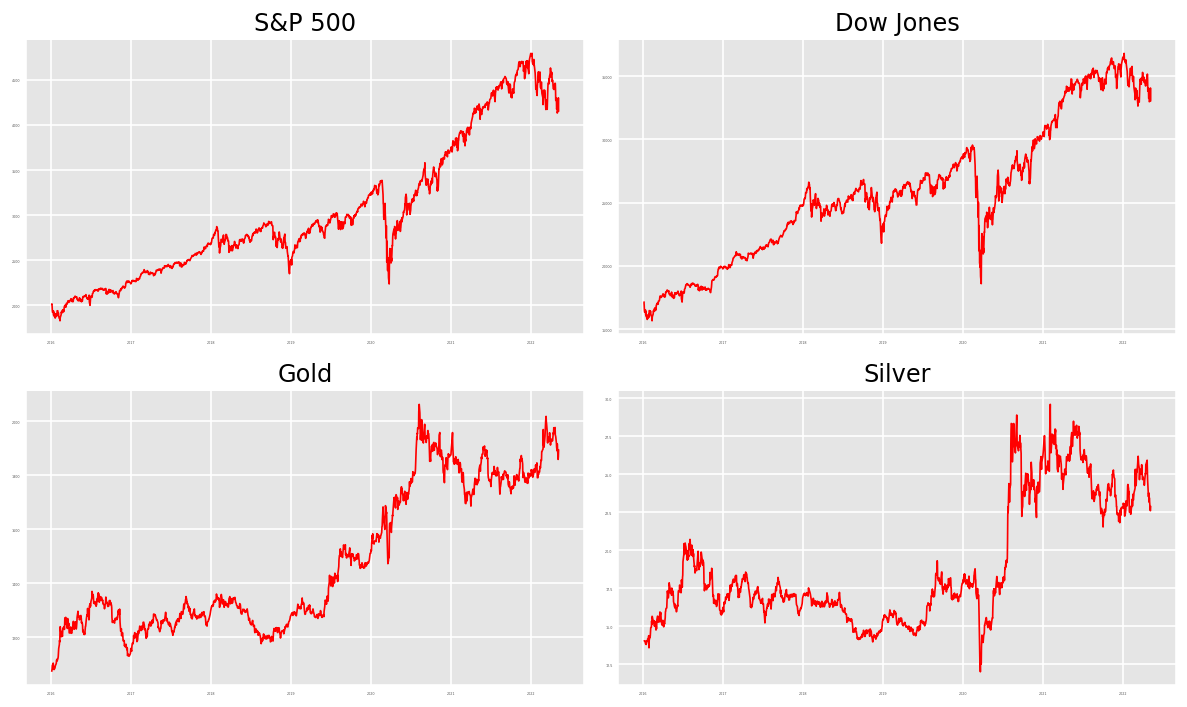

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = dftt[dftt.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(dftt.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=2)

plt.tight_layout();

In [96]:
ad_fuller_result_1 = adfuller(dftt['S&P 500'].diff()[1:])

print('realS&P 500')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(dftt['Dow Jones'].diff()[1:])

print('realDow Jones')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
ad_fuller_result_2 = adfuller(dftt['Dow Jones'].diff()[1:])

ad_fuller_result_3 = adfuller(dftt['Silver'].diff()[1:])

print('realSilver')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
ad_fuller_result_3 = adfuller(dftt['Silver'].diff()[1:])

ad_fuller_result_4 = adfuller(dftt['Gold'].diff()[1:])

print('realGold')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
ad_fuller_result_4 = adfuller(dftt['Gold'].diff()[1:])



realS&P 500
ADF Statistic: -10.682057915323593
p-value: 3.9174164695528884e-19

---------------------

realDow Jones
ADF Statistic: -11.134224130157568
p-value: 3.225321891621518e-20
realSilver
ADF Statistic: -11.134224130157568
p-value: 3.225321891621518e-20
realGold
ADF Statistic: -11.134224130157568
p-value: 3.225321891621518e-20


In [27]:
print('S&P 500 causes Dow Jones\n')
print('------------------')
granger_1 = grangercausalitytests(dftt[['Dow Jones', 'S&P 500']], 4)

print('Dow Jones causes S&P 500?\n')
print('------------------')
granger_2 = grangercausalitytests(dftt[['S&P 500', 'Dow Jones']], 4)

S&P 500 causes Dow Jones

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2204  , p=0.2695  , df_denom=1565, df_num=1
ssr based chi2 test:   chi2=1.2227  , p=0.2688  , df=1
likelihood ratio test: chi2=1.2223  , p=0.2689  , df=1
parameter F test:         F=1.2204  , p=0.2695  , df_denom=1565, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4977  , p=0.6080  , df_denom=1562, df_num=2
ssr based chi2 test:   chi2=0.9987  , p=0.6069  , df=2
likelihood ratio test: chi2=0.9984  , p=0.6070  , df=2
parameter F test:         F=0.4977  , p=0.6080  , df_denom=1562, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3073  , p=0.2704  , df_denom=1559, df_num=3
ssr based chi2 test:   chi2=3.9396  , p=0.2681  , df=3
likelihood ratio test: chi2=3.9346  , p=0.2686  , df=3
parameter F test:         F=1.3073  , p=0.2704  , df_denom=1559, df_num=3

Granger Causality
number of lags (no zero)

In [97]:
print('Gold causes Silver?\n')
print('------------------')
granger_1 = grangercausalitytests(dftt[['Silver', 'Gold']], 4)

print('\Silver causes Gold?\n')
print('------------------')
granger_2 = grangercausalitytests(dftt[['Gold', 'Silver']], 4)

Gold causes Silver?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4909  , p=0.0063  , df_denom=1565, df_num=1
ssr based chi2 test:   chi2=7.5053  , p=0.0062  , df=1
likelihood ratio test: chi2=7.4874  , p=0.0062  , df=1
parameter F test:         F=7.4909  , p=0.0063  , df_denom=1565, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1782  , p=0.0155  , df_denom=1562, df_num=2
ssr based chi2 test:   chi2=8.3832  , p=0.0151  , df=2
likelihood ratio test: chi2=8.3609  , p=0.0153  , df=2
parameter F test:         F=4.1782  , p=0.0155  , df_denom=1562, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0742  , p=0.0268  , df_denom=1559, df_num=3
ssr based chi2 test:   chi2=9.2641  , p=0.0260  , df=3
likelihood ratio test: chi2=9.2368  , p=0.0263  , df=3
parameter F test:         F=3.0742  , p=0.0268  , df_denom=1559, df_num=3

Granger Causality
number of lags (no zero) 4
ss

In [98]:
dftt = dftt[['S&P 500','Dow Jones','Gold','Silver']]
print(dftt.shape)

(1569, 4)


In [99]:
train_df=dftt[:-12]
test_df=dftt[-12:]

In [100]:
print(test_df.shape)

(12, 4)


In [101]:
model = VAR(train_df.diff()[1:])

In [102]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        18.52      18.53*   1.102e+08       18.52
1        18.47       18.53   1.046e+08      18.49*
2        18.46       18.58   1.039e+08       18.51
3        18.46       18.64   1.040e+08       18.53
4        18.46       18.70   1.044e+08       18.55
5        18.46       18.76   1.043e+08       18.57
6        18.45       18.80   1.034e+08       18.58
7        18.44       18.85   1.023e+08       18.59
8        18.44       18.90   1.019e+08       18.61
9       18.43*       18.94  1.005e+08*       18.62
10       18.43       19.00   1.009e+08       18.64
11       18.44       19.06   1.016e+08       18.67
12       18.45       19.13   1.032e+08       18.71
13       18.45       19.19   1.033e+08       18.73
14       18.47       19.26   1.046e+08       18.76
15       18.47       19.31   1.047e+08       18.78
16       18.48       19.38   1.

In [103]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                       Statespace Model Results                                       
Dep. Variable:     ['S&P 500', 'Dow Jones', 'Gold', 'Silver']   No. Observations:                 1557
Model:                                                 VAR(4)   Log Likelihood              -23130.868
                                                  + intercept   AIC                          46417.736
Date:                                        Wed, 15 Jun 2022   BIC                          46835.076
Time:                                                16:35:56   HQIC                         46572.920
Sample:                                                     0                                         
                                                       - 1557                                         
Covariance Type:                                          opg                                         
Ljung-Box (L1) (Q):     0.01, 0.00, 0.00, 0.00   Jarque-Bera (JB):   6891

In [104]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [105]:
predictions.columns=['S&P 500_predicted','Dow Jones_predicted','Gold_predicted','Silver_predicted']
predictions

,S&P 500_predicted,Dow Jones_predicted,Gold_predicted,Silver_predicted
1557,4404.351165,34530.501274,1969.126134,25.660995
1558,4401.369283,34500.930865,1969.533836,25.634316
1559,4407.470444,34534.235937,1972.184588,25.727710
1560,4408.337820,34534.058203,1973.159581,25.752159
1561,4409.766678,34539.038631,1973.683069,25.776138
1562,4410.307496,34536.866194,1974.163571,25.791381
1563,4411.255141,34537.194621,1974.627912,25.809634
1564,4412.255163,34537.767049,1975.131291,25.828271
1565,4413.232429,34538.214349,1975.619260,25.847089
1566,4414.233406,34538.936110,1976.104394,25.865667


In [106]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

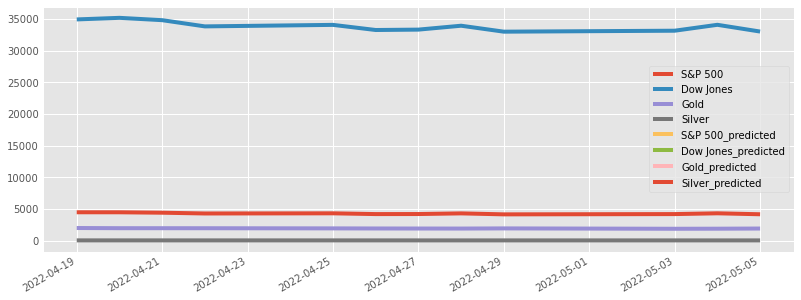

In [107]:
test_vs_pred.plot(figsize=(12,5))

In [108]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_SP =math.sqrt(mean_squared_error(predictions['S&P 500_predicted'],test_df['S&P 500']))
print('Mean value of S&P 500 is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['S&P 500']),rmse_SP))

rmse_DJ=math.sqrt(mean_squared_error(predictions['Dow Jones_predicted'],test_df['Dow Jones']))
print('Mean value of DowJOnes is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Dow Jones']),rmse_DJ))

rmse_Gold=math.sqrt(mean_squared_error(predictions['Gold_predicted'],test_df['Gold']))
print('Mean value of Gold is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Gold']),rmse_Gold))

rmse_Silver=math.sqrt(mean_squared_error(predictions['Silver_predicted'],test_df['Silver']))
print('Mean value of Silver is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Silver']),rmse_Silver))

Mean value of S&P 500 is : 4273.694166666666. Root Mean Squared Error is :178.62649416853426
Mean value of DowJOnes is : 33862.42833333333. Root Mean Squared Error is :1001.4687360699855
Mean value of Gold is : 1913.0791666666667. Root Mean Squared Error is :70.44816263025456
Mean value of Silver is : 23.814166666666665. Root Mean Squared Error is :2.2441463633925625
